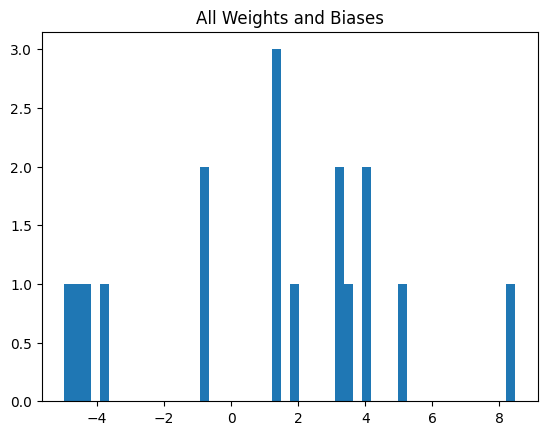

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class NeuralNetwork:
    def __init__(self, n_inputs, n_hidden1, n_hidden2, n_outputs):
        self.n_inputs = n_inputs
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.n_outputs = n_outputs

        self.weights1 = np.random.rand(n_inputs, n_hidden1)
        self.biases1 = np.zeros((1, n_hidden1))

        self.weights2 = np.random.rand(n_hidden1, n_hidden2)
        self.biases2 = np.zeros((1, n_hidden2))

        self.weights3 = np.random.rand(n_hidden2, n_outputs)
        self.biases3 = np.zeros((1, n_outputs))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_pass(self, inputs):
        hidden1 = self.sigmoid(np.dot(inputs, self.weights1) + self.biases1)
        hidden2 = self.sigmoid(np.dot(hidden1, self.weights2) + self.biases2)
        outputs = self.sigmoid(np.dot(hidden2, self.weights3) + self.biases3)
        return outputs

    def train(self, inputs, targets, learning_rate):
        # Forward pass
        hidden1 = self.sigmoid(np.dot(inputs, self.weights1) + self.biases1)
        hidden2 = self.sigmoid(np.dot(hidden1, self.weights2) + self.biases2)
        outputs = self.sigmoid(np.dot(hidden2, self.weights3) + self.biases3)

        # Backward pass
        output_error = targets - outputs
        output_delta = output_error * self.sigmoid_derivative(outputs)

        hidden2_error = output_delta.dot(self.weights3.T)
        hidden2_delta = hidden2_error * self.sigmoid_derivative(hidden2)

        hidden1_error = hidden2_delta.dot(self.weights2.T)
        hidden1_delta = hidden1_error * self.sigmoid_derivative(hidden1)

        # Weight updates
        self.weights3 += learning_rate * hidden2.T.dot(output_delta)
        self.biases3 += learning_rate * np.sum(output_delta, axis=0, keepdims=True)

        self.weights2 += learning_rate * hidden1.T.dot(hidden2_delta)
        self.biases2 += learning_rate * np.sum(hidden2_delta, axis=0, keepdims=True)

        self.weights1 += learning_rate * inputs.T.dot(hidden1_delta)
        self.biases1 += learning_rate * np.sum(hidden1_delta, axis=0, keepdims=True)
    
    def plot_weights_and_biases(self):
        weights_and_biases = np.concatenate([
            self.weights1.flatten(),
            self.biases1.flatten(),
            self.weights2.flatten(),
            self.biases2.flatten(),
            self.weights3.flatten(),
            self.biases3.flatten()
        ])

        plt.hist(weights_and_biases, bins=50)
        plt.title('All Weights and Biases')
        plt.show()

nn = NeuralNetwork(5, 2, 1, 1)

df = pd.read_csv('dividendinfo.csv')
X = df[['fcfps', 'earnings_growth', 'de', 'mcap', 'current_ratio']]
Y = df['dividend']

#normalize X by column
X_norm = (X - X.min()) / (X.max() - X.min())

inputs = np.array(X_norm)
labels = np.array([[i] for i in np.array(Y)])

learning_rate = 0.1
np.random.seed(42)

for i in range(1000):
    indices = np.random.choice(len(inputs), size=80, replace=False)
    selected_inputs = inputs[indices]
    selected_labels = labels[indices]

    nn.train(selected_inputs, selected_labels, learning_rate)

#print(nn.forward_pass(inputs))
nn.plot_weights_and_biases()

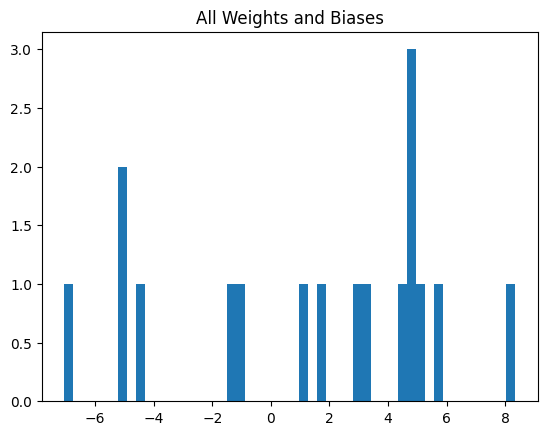

In [6]:

for i in range(1000):
    indices = np.random.choice(len(inputs), size=160, replace=False)
    selected_inputs = inputs[indices]
    selected_labels = labels[indices]

    nn.train(selected_inputs, selected_labels, learning_rate)

#print(nn.forward_pass(inputs))
nn.plot_weights_and_biases()

The parameters tends to be varying a lot

d:\Anaconda\envs\torchgpu\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\torchgpu\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\torchgpu\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\torchgpu\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

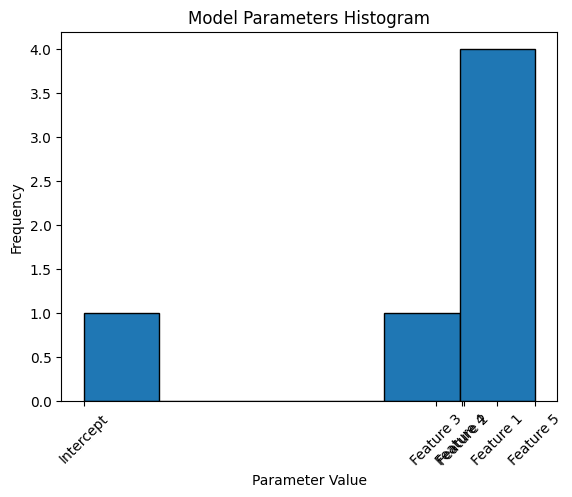

In [10]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('dividendinfo.csv')
X = df[['fcfps', 'earnings_growth', 'de', 'mcap', 'current_ratio']]
Y = df['dividend']

#normalize X by column
X_norm = X

inputs = np.array(X_norm)
labels = np.array([[i] for i in np.array(Y)])

logreg = LogisticRegression()

for i in range(1000):
    indices = np.random.choice(len(inputs), size=160, replace=False)
    selected_inputs = inputs[indices]
    selected_labels = labels[indices]

    logreg.fit(selected_inputs, selected_labels)

params = np.concatenate((logreg.coef_[0], logreg.intercept_))

# create a histogram
plt.hist(params, bins=6, edgecolor='black')

# set labels and title
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.title('Model Parameters Histogram')

# set xticks to show parameter names
param_names = [f'Feature {i+1}' for i in range(5)] + ['Intercept']
plt.xticks(params, param_names, rotation=45)

# show the plot
plt.show()

d:\Anaconda\envs\torchgpu\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\torchgpu\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\torchgpu\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\envs\torchgpu\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

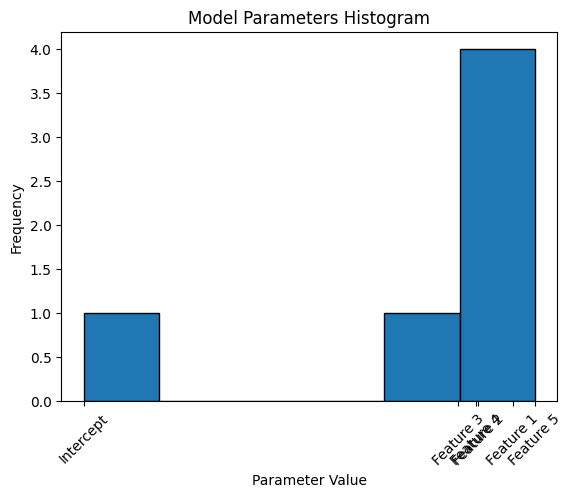

In [11]:
logreg = LogisticRegression()

for i in range(1000):
    indices = np.random.choice(len(inputs), size=80, replace=False)
    selected_inputs = inputs[indices]
    selected_labels = labels[indices]

    logreg.fit(selected_inputs, selected_labels)

params = np.concatenate((logreg.coef_[0], logreg.intercept_))

# create a histogram
plt.hist(params, bins=6, edgecolor='black')

# set labels and title
plt.xlabel('Parameter Value')
plt.ylabel('Frequency')
plt.title('Model Parameters Histogram')

# set xticks to show parameter names
param_names = [f'Feature {i+1}' for i in range(5)] + ['Intercept']
plt.xticks(params, param_names, rotation=45)

# show the plot
plt.show()

The parameter tend to be more stable.

The main reason is nn is higher complexity and more sensitive to data, while LR is less complexity and more stable in optimization. Parameter only have 6, clear and easy to understand, but NN is a blackbox, cannot be interpret directly and thus not stable.